In [46]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

In [47]:
import to_upward

In [48]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [49]:
import datetime as dt
end_03 = dt.datetime(2023,3,1).strftime("%Y%m%d")
start_03 = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220912 20230912


In [50]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [51]:
stocks = recommendation["Name"].to_list()

In [52]:
stocks

['삼성전자',
 'SK하이닉스',
 'POSCO홀딩스',
 'LG화학',
 '현대차',
 '기아',
 'LG전자',
 'HMM',
 'LG이노텍',
 '키움증권',
 '효성첨단소재',
 '두산',
 '효성티앤씨']

In [53]:
def get_close(data,stocks,start,end): # stocks 전역변수 수정
    tmp = pd.DataFrame()
    for n in stocks:
        tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
    return tmp

In [54]:
before_data = get_close(data,stocks,start_03,end_03)
before_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
2022-09-14,56800,93000,239500,663000,198500,80300,94000,20750,348000,84600,418500,71300,303500
2022-09-15,56000,92000,235000,658000,198000,80000,92000,21050,344000,84300,424000,80400,308000
2022-09-16,56200,91200,230500,635000,201000,81100,90600,20600,332500,82900,409000,84100,306500
2022-09-19,56400,90000,231000,635000,201500,80800,90400,19850,334000,81900,395000,76100,298000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,61100,89100,332000,666000,174200,74500,111100,21950,286000,103600,417500,85600,467000
2023-02-23,62000,92700,331500,668000,176200,76400,114700,22800,290500,107100,426500,91100,470000
2023-02-24,61300,91000,322000,669000,173900,75300,113400,23050,283000,106100,417500,90400,461500


In [55]:
now_data = get_close(data,stocks,start,end)
now_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
2022-09-14,56800,93000,239500,663000,198500,80300,94000,20750,348000,84600,418500,71300,303500
2022-09-15,56000,92000,235000,658000,198000,80000,92000,21050,344000,84300,424000,80400,308000
2022-09-16,56200,91200,230500,635000,201000,81100,90600,20600,332500,82900,409000,84100,306500
2022-09-19,56400,90000,231000,635000,201500,80800,90400,19850,334000,81900,395000,76100,298000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,70000,118200,580000,585000,186700,78900,100500,16580,269000,98400,451500,108000,361500
2023-09-07,70400,118500,568000,577000,187200,78300,99800,16600,252500,99200,452000,106500,364500
2023-09-08,70300,113700,583000,564000,185700,77800,98800,16810,244500,102100,451000,116800,360500


In [56]:
kospi200 = stock.get_index_ohlcv_by_date(start_03, end, "1028")['종가']
display(kospi200)

날짜
2022-09-13    318.56
2022-09-14    312.74
2022-09-15    310.63
2022-09-16    308.69
2022-09-19    306.49
               ...  
2023-09-06    337.85
2023-09-07    336.74
2023-09-08    336.40
2023-09-11    337.58
2023-09-12    335.54
Name: 종가, Length: 250, dtype: float64

In [57]:
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]

In [58]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]
rf = 0.0325
# 개별 shape 말고 고객에게 제시하는 주식 중 고객이 선택한 주식과 상관계수가 낮은 기업으로 포트폴리오를 구성해주는 것은 어떨까?

In [59]:
import scipy.optimize as sco
def stat(weights,annual_cov,annual_ret):
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    return [risk,returns]

class Effective_frontier:
    def __init__(self,annual_cov,annual_ret):
        self.annual_cov = annual_cov
        self.annual_ret = annual_ret

    def ef(self,weight):
        return stat(weight,self.annual_cov,self.annual_ret)[0]**2
    
# def effective_frontier(weight):
#     return stat(weight,annual_cov,annual_ret)[0]**2

def get_portfolio(stocks,annual_ret,annual_cov):
    port_ret = []
    port_risk = []
    port_weights = []
    shape_ratio = []

    for i in range(5000):

        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)


        returns = np.dot(weights, annual_ret)

        risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        port_ret.append(returns)
        port_risk.append(risk)
        port_weights.append(weights)
        shape_ratio.append(returns/risk)

    portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
    for j, s in enumerate(stocks):
        portfolio[s] = [weight[j] for weight in port_weights]

    df = pd.DataFrame(portfolio)

    max_shape = df.loc[df['Shape'] == df['Shape'].max()]
    min_risk = df.loc[df['Risk'] == df['Risk'].min()]

    weight = np.random.random(len(stocks))
    weight = weight/np.sum(weight)
    #최적화 
    bnds = tuple((0,1) for x in range(len(stocks)))
    T_return = np.linspace(df['Returns'].min(),df['Returns'].max(),50) #수익률 구간 0~20%  
    T_vol = []           #목표 수익률별 최저분산 포트폴리오의 표준편차가 들어갈 벡터

    ef = Effective_frontier(annual_cov,annual_ret)
    for r in T_return :
        cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1},   #np.sum(x) = 비중의 총합   
                    {'type' : 'eq', 'fun' : lambda x : stat(x,annual_cov,annual_ret)[1] - r }) #Tr = 목표 수익률 
        opts = sco.minimize(ef.ef, weight, method = 'SLSQP', bounds = bnds, constraints = cons) #제한 수익률에서 분산 minimize
        T_vol.append(np.sqrt(opts['fun']))
        
    tmp2 = pd.DataFrame({'Returns': T_return, 'Risk':T_vol})

    return max_shape,min_risk,tmp2,df

In [60]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks,annual_ret,annual_cov)

In [61]:
def show_CAPM(df, tmp2, max_shape, min_risk, rf=0.0325):
    df.plot.scatter(x='Risk', y='Returns', c='Shape', cmap='viridis', edgecolors='k', figsize=(10,8), grid=True)
    plt.plot(tmp2['Risk'], tmp2['Returns'], label='Efficient Frontier', linewidth=5,color='red')
    plt.scatter(max_shape['Risk'], max_shape['Returns'], label='Max_Shape', marker='*',s=500)
    plt.scatter(min_risk['Risk'], min_risk['Returns'], label='Min_risk', marker='*', s=500)
    plt.plot([0, max_shape['Risk'].iloc[0], 0.5], [rf, max_shape['Returns'].iloc[0], (max_shape['Returns'].iloc[0] - rf) / max_shape['Risk'].iloc[0] * 0.5 + rf], label='New EF', linewidth=2,color='green')
    plt.xlabel('Risk')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier Graph')
    plt.legend()
    plt.show()

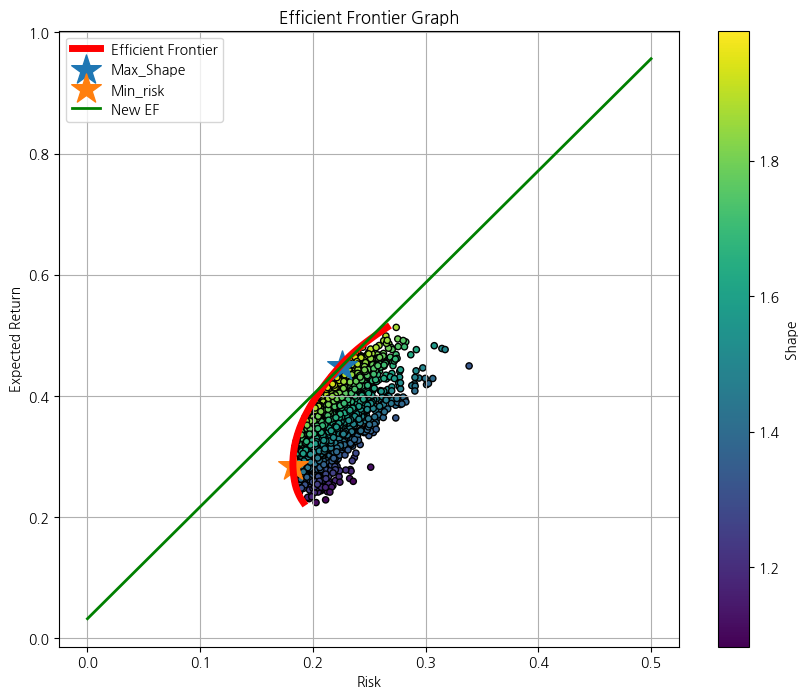

In [62]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.0325)

In [63]:
def show_portfolio(max_shape):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import sympy
    exp_ret = float(input("원하는 기대수익률은 얼마인가?"))/100
    w = sympy.Symbol('w')

    equation = w*0.02 + (1-w)*max_shape['Returns'].values[0] - exp_ret

    solution = sympy.solve(equation, w)
    solution = float(solution[0])
    if solution < 0 :
        print(f"차입 비중 : {-solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
    else : 
        print(f"채권의 비중 : {solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
        
    if solution >= 0:

        fig = make_subplots(rows=2, cols=1, specs=[[{"type": "pie"}], [{"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>기대수익을 위한 포트폴리오<br><sup>자기자본의 {solution*100:0.4}%만큼 채권투자</sup>"))
        fig.update_layout(width=400, height=600) 
        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]),
            labels=list(max_shape.columns[-5:]),
            domain=dict(x=[0, 0.5]),
            name="기존 포트폴리오"),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]* (1-float(solution)))+[float(solution)] ,
            labels=list(max_shape.columns[-5:]) + ['채권'],
            domain=dict(x=[0.5, 1.0]),
            name="기대수익 포트폴리오"),
            row=2, col=1)

        return fig, solution

    else:
        fig = make_subplots(rows=2, cols=1, specs=[[{"type": "pie"}], [{"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>투자금 비중</b><br><sup>자기자본의 {-solution*100:0.4}%만큼 차입</sup>"))

        fig.update_layout(width=400, height=600) 
        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]),
            labels=list(max_shape.columns[-5:]),
            domain=dict(x=[0, 0.5])),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=[1/(1-solution),1-(1/(1-solution))] ,
            labels=['자기자본','차입금'],
            domain=dict(x=[0.5, 1.0])),
            row=2, col=1)

        return fig, solution

In [64]:
fig, solution = show_portfolio(max_shape)

채권의 비중 : 0.5806331889380439
이 경우 Risk : 0.09455819302274399


In [65]:
fig.show()

In [66]:
def geometric_brownian_motion(tmp,S0, T=100, dt=1/100):
    """
    S0: 초기값
    mu: 평균
    sigma: 표준 편차
    T: 시뮬레이션 시간
    dt: 시간 간격
    """

    # Brownian motion
    W = np.random.normal(0, 1, (T, 1))

    daily_returns = tmp.pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return =((1 + mean_return) ** T) - 1

    # 변동성 계산
    mu = annual_return/T
    sigma = daily_returns.std()
    
    X = np.zeros((T, 1))
    X[0] = S0
    for t in range(1, T):
        X[t] = X[t - 1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * W[t])

    return X
    
def monte_sim(sim_num,tmp,stocks,stock_money,day=100):
    sim_num = sim_num
    balance_df = pd.DataFrame(np.zeros((sim_num,day)))
    for i in range(len(stocks)):
        X = []
        for k in range(sim_num):
            X.append(geometric_brownian_motion(tmp[stocks[i]],stock_money[stocks[i]].iloc[0]))
        balance_df += pd.DataFrame(np.array(X).reshape(sim_num,day))
    return balance_df.T

In [67]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,효성티앤씨,POSCO홀딩스,두산,키움증권,LG전자
2478,412370.556912,306362.373204,213790.781002,23289.520876,44186.768005


In [68]:
sim_num = 1000
balance_df = monte_sim(sim_num,before_data,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,9.826629e+05,1.013639e+06,9.795603e+05,1.025925e+06,9.704054e+05,1.026244e+06,9.876931e+05,1.017448e+06,1.014249e+06,9.713247e+05,...,9.848437e+05,1.027687e+06,9.965553e+05,9.749555e+05,1.022678e+06,9.961510e+05,1.035545e+06,9.805553e+05,9.905390e+05,9.995840e+05
2,9.785875e+05,1.000631e+06,9.485552e+05,1.035573e+06,9.610512e+05,1.011109e+06,9.850066e+05,1.016296e+06,1.020870e+06,9.546781e+05,...,1.004378e+06,1.017764e+06,9.665816e+05,9.680084e+05,1.015389e+06,1.016617e+06,1.024476e+06,9.954047e+05,9.879130e+05,9.794832e+05
3,9.743334e+05,1.006822e+06,9.551022e+05,1.041016e+06,9.538817e+05,9.872685e+05,1.001107e+06,1.013347e+06,1.048046e+06,9.564056e+05,...,9.982065e+05,1.031483e+06,9.538569e+05,9.688020e+05,1.030437e+06,1.017866e+06,1.032850e+06,1.006974e+06,9.988905e+05,9.709075e+05
4,9.888304e+05,1.017557e+06,9.341172e+05,1.048068e+06,9.721184e+05,9.855866e+05,1.037776e+06,1.003274e+06,1.053410e+06,9.665743e+05,...,9.934942e+05,1.038425e+06,9.593879e+05,9.398104e+05,1.011327e+06,1.033457e+06,1.017912e+06,1.027770e+06,1.004303e+06,9.522956e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.068657e+06,1.098815e+06,1.223631e+06,1.013124e+06,1.013569e+06,1.174863e+06,1.110431e+06,9.413379e+05,1.514912e+06,1.038657e+06,...,1.148799e+06,8.750826e+05,1.144616e+06,9.184594e+05,1.124919e+06,9.563451e+05,1.174473e+06,1.080934e+06,8.819375e+05,1.092472e+06
96,1.057124e+06,1.086040e+06,1.235570e+06,1.006223e+06,9.918122e+05,1.177131e+06,1.108951e+06,9.492173e+05,1.484139e+06,1.066473e+06,...,1.142615e+06,8.697089e+05,1.157765e+06,9.664549e+05,1.155358e+06,9.966489e+05,1.192857e+06,1.086774e+06,8.947407e+05,1.083670e+06
97,1.056474e+06,1.078358e+06,1.234207e+06,1.003109e+06,9.816741e+05,1.192006e+06,1.121574e+06,9.552351e+05,1.493910e+06,1.061015e+06,...,1.162090e+06,8.801199e+05,1.153226e+06,9.271148e+05,1.130935e+06,1.018058e+06,1.204199e+06,1.081703e+06,9.110073e+05,1.111639e+06
98,1.031461e+06,1.097102e+06,1.223470e+06,1.014642e+06,1.004445e+06,1.138268e+06,1.119738e+06,9.732223e+05,1.458416e+06,1.061791e+06,...,1.174632e+06,8.908886e+05,1.156203e+06,9.417313e+05,1.100706e+06,1.001338e+06,1.225615e+06,1.104468e+06,9.062057e+05,1.132514e+06


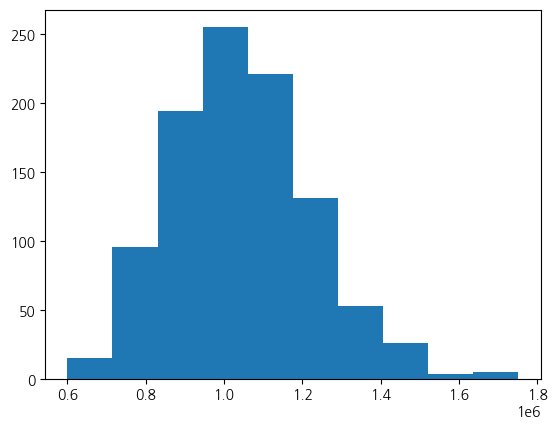

In [29]:
plt.hist(balance_df.iloc[99])
plt.show()

In [69]:
import plotly.express as px
def get_simret(balance_df,balance,max_shape,solution,now_data=None,kospi200=None):
    port_weigth = max_shape[max_shape.columns[3:]].values
    tmp3 = pd.DataFrame()
    for i in [0.9,0.75,0.5,0.25,0.1]:
        lst = []
        idx = balance_df.T[balance_df.iloc[-1] >= balance_df.iloc[-1].quantile(i)][99].sort_values().index[0]
        for k in range(19,100,20):
            lst.append((balance_df.T.iloc[idx].iloc[k]-balance)/balance*100)
        tmp3[f'{100-i*100}%'] = lst

    tmp3.index=[f"{i}month" for i in range(1,6)]
    tmp3.columns =['호황','상승','평년','하락','불황']
    if now_data is not None:
        future_data = now_data[(now_data.index >before_data.index.max())&(now_data.index < dt.datetime(2023,8,2))]
        future_data = future_data[stocks].groupby(future_data.index.to_period('M')).first()
        future_data = (future_data/future_data.iloc[0]-1).drop(index=future_data.index[0])
        tmp3['real'] = ((future_data*port_weigth).sum(axis=1)*100).to_list()
    tmp3 = tmp3*(1-solution) + rf*solution*100
    if kospi200 is not None:
        f_kospi =kospi200[(kospi200.index >before_data.index.max())&(kospi200.index < dt.datetime(2023,8,2))]
        f_kospi = f_kospi.groupby(f_kospi.index.to_period('M')).first()
        f_kospi = (f_kospi/f_kospi.iloc[0]-1).drop(index=f_kospi.index[0])
        tmp3['KOSPI'] = (f_kospi*100).to_list()

    return tmp3

In [70]:
sim_data = get_simret(balance_df,balance,max_shape,solution,now_data,kospi200)
display(sim_data)
display(px.line(sim_data))

,호황,상승,평년,하락,불황,real,KOSPI
1month,1.791911,3.749383,4.597522,6.889657,4.258258,2.763563,1.302726
2month,6.645647,13.230439,6.460305,1.309314,-5.343008,1.080544,4.056789
3month,8.013129,10.624892,7.857648,0.291623,-5.863882,-0.427394,6.899387
4month,12.978411,13.939803,5.944259,-1.229298,-0.380950,0.593955,8.480364
5month,14.118410,8.540813,3.545095,-1.258504,-4.900774,9.802319,10.984633


지난 3월~ 8월은 상승장이었습니다. 따라서 시뮬레이션 결과인 상승장의 흐름을 많이 따라간 것을 알 수 있습니다.
따라서 향후 저희가 제시하는 포트폴리오를 보시고 시황에 맞게 대응하시면 될 것 같습니다.

In [33]:
stocks = recommendation["Name"].to_list()

In [34]:
daily_ret = now_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**now_data[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * now_data[stocks].shape[0]

In [35]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]
rf = 0.0325

In [36]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks,annual_ret,annual_cov)

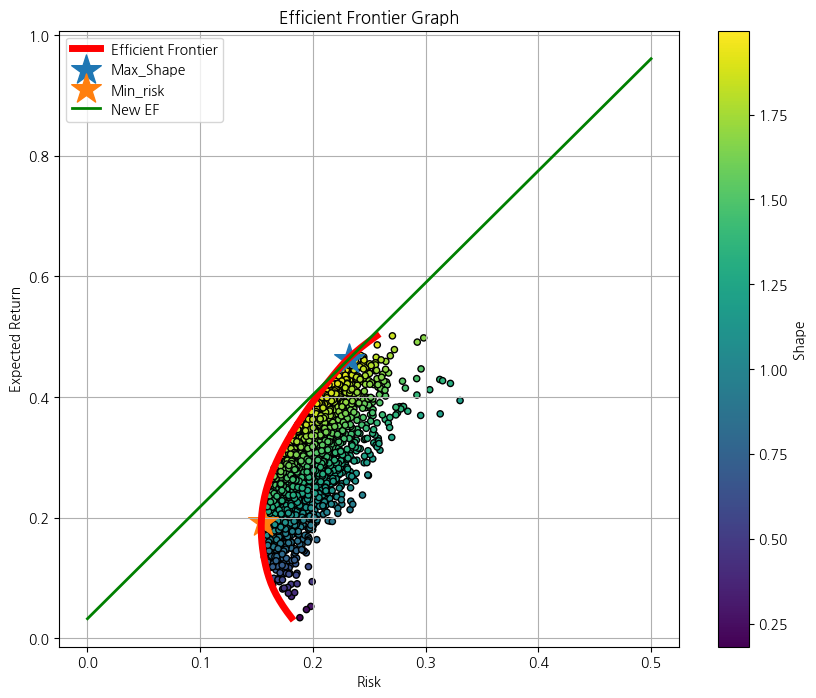

In [37]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.0325)

In [39]:
fig,solution = show_portfolio(max_shape)

채권의 비중 : 0.5945257555465299
이 경우 Risk : 0.0941947386169674


In [40]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance

sim_num = 1000
balance_df = monte_sim(sim_num,before_data,stocks,stock_money)


In [45]:
sim_data2 = get_simret(balance_df,balance,max_shape,solution,now_data=None,kospi200=None)
display(sim_data2)
display(px.line(sim_data2))

,호황,상승,평년,하락,불황
1month,-0.480572,6.326197,2.052061,1.622717,5.794479
2month,4.566294,12.478248,2.445919,-0.519369,0.231508
3month,3.458350,11.217378,-2.379538,-4.780111,-3.591957
4month,5.729404,4.345551,-1.557362,-0.361041,-4.196725
5month,15.046208,9.235351,3.274804,-1.409305,-5.484253
